In [2]:
import pandas as pd
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


In [18]:
weather_data = pd.read_csv("weather_daily.csv")
cali_fires = pd.read_csv("california_wildfire_data_cleaned.csv") #this file is from Dagim. I take no credit in the creation of this CSV.

In [19]:
weather_data.isna().mean()*100 #checking to see for NaN Values


location_id           0.0
time                  0.0
Temp (C)              0.0
average humidity %    0.0
average wind speed    0.0
dtype: float64

In [20]:
weather_data["location_id"] = weather_data["location_id"].replace({0: "Sacramento", 1: "Fresno", 2: "LA"}) #Changing location IDS to cities

In [21]:
type(cali_fires["Fire Started"][1])

str

In [22]:
cali_fires["Fire Started"] = pd.to_datetime(cali_fires["Fire Started"]) #Need to convert dt string to dtg to match my temperature data

In [23]:
cali_fires["Fire Started"] = cali_fires["Fire Started"].dt.date # times in a dtg is a burnden for me. I can now work with both data sets

In [24]:
type(weather_data["time"][1]) # Also a string. Will have to change this too.

str

In [25]:
weather_data["time"] = pd.to_datetime(weather_data["time"]) #dt.date only works with dtg

In [26]:
weather_data["time"] = weather_data["time"].dt.date 

In [27]:
type(weather_data["time"][1]) #same format. Perfect!

datetime.date

In [28]:
weather_data

,location_id,time,Temp (C),average humidity %,average wind speed
0,Sacramento,2013-01-01,-6.600000,73.958333,32.054167
1,Sacramento,2013-01-02,-5.412500,62.458333,29.004167
2,Sacramento,2013-01-03,-3.400000,60.791667,20.166667
3,Sacramento,2013-01-04,-1.666667,59.166667,28.958333
4,Sacramento,2013-01-05,-2.695833,60.041667,18.370833
...,...,...,...,...,...
8761,LA,2020-12-27,4.870833,82.375000,11.291667
8762,LA,2020-12-28,3.100000,86.375000,35.941667
8763,LA,2020-12-29,-5.687500,46.666667,28.833333
8764,LA,2020-12-30,-6.320833,42.708333,22.008333


In [29]:
weather_by_city = weather_data.groupby(["location_id","time"]).mean() # this gives us data grouped by city
#then groups to make an average by day by city. Unsure if this will be helpful, but it's worth having

In [30]:
avg_daily =weather_data.drop(["location_id"],axis = 1, inplace = True)# dropping location ID. Will not average well.
avg_daily = weather_data.groupby(["time"]).mean()
avg_daily.reset_index()
# The 3 cities were picked to be a representative sample of california weather, taken from 3 major cities, one from the north, middle and south
# of the state. All conditions are averaged to take an approximate "state average."  

,time,Temp (C),average humidity %,average wind speed
0,2013-01-01,-4.941667,63.611111,27.830556
1,2013-01-02,-6.508333,50.444444,23.434722
2,2013-01-03,-5.663889,52.805556,14.170833
3,2013-01-04,-4.451389,51.125000,15.762500
4,2013-01-05,-3.670833,53.402778,11.315278
...,...,...,...,...
2917,2020-12-27,2.694444,82.041667,15.708333
2918,2020-12-28,0.240278,80.888889,40.044444
2919,2020-12-29,-6.926389,54.694444,41.340278
2920,2020-12-30,-5.663889,44.652778,29.204167


In [31]:
cali_fires.rename(columns = {"Fire Started":"time"}, inplace = True) # giving myself something to merge onto
cali_fires

,Unnamed: 0,Incident Name,County,Administrative Unit,Acres Burned,Crews Involved,Dozers,Engines,Fatalities,Helicopters,...,Personnel Involved,Structures Damaged,Structures Destroyed,Structures Threatened,Water Tenders,time,Fire Extinguished,Longitude,Latitude,Incident ID
0,0,River Fire,Inyo,CAL FIRE San Bernardino Unit,407.0,25.0,25.0,25.0,0.0,0.0,...,476.0,0.0,0.0,0.0,25.0,2013-02-24,2013-02-28T20:00:00Z,-118.016510,36.602575,094719ba-a47b-4abb-9ec5-a506b2b9fd23
1,1,Fawnskin Fire,San Bernardino,San Bernardino National Forest,30.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2013-04-20,2013-04-22T09:00:00Z,-116.941311,34.288877,58f89ff8-bd3e-4355-b1c0-8fa05c747d3f
2,2,Gold Fire,Madera,CAL FIRE Madera-Mariposa-Merced Unit,274.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2013-04-30,2013-05-01T07:00:00Z,-119.635004,37.116295,357ffc13-bef9-48eb-810f-c5de851972eb
3,3,Silverado Fire,Napa,CAL FIRE Sonoma-Lake-Napa Unit,75.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2013-04-30,2013-05-01T17:15:00Z,-122.350844,38.441792,d8d1c943-7b5d-4885-9043-f41075d6eded
4,4,Yellow Fire,Sonoma,CAL FIRE Sonoma-Lake-Napa Unit,125.0,9.0,5.0,17.0,0.0,5.0,...,249.0,0.0,0.0,0.0,5.0,2013-05-01,2013-05-03T06:15:00Z,-122.655616,38.638828,64e4f81e-d872-44c4-ba8d-111fa77124ba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774,2774,Laguna Fire,Ventura,Ventura County Fire Department,83.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2025-01-23,2025-01-26T18:13:08Z,-119.059000,34.165500,d45df9b2-8dc5-4d88-864b-f3a842c8a2fc
2775,2775,Border 2 Fire,San Diego,Unified Command: CAL FIRE San Diego Unit & San...,6625.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2025-01-23,2025-02-20 10:24:04+00:00,-116.843700,32.594700,a9719e0a-db5d-48d4-895c-5b096ae1802d
2776,2776,Gilman Fire,San Diego,San Diego City Fire,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2025-01-23,2025-01-24T00:00:00Z,-117.237000,32.862200,22ec23e5-b380-4ee4-942f-26c12a4576d7
2777,2777,Gibbel Fire,Riverside,CAL FIRE Riverside Unit,15.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2025-01-23,2025-01-24T00:00:00Z,-116.964339,33.708601,a79b51d3-9ae7-4ec3-a8ca-9f733b89df9a


In [32]:
weather_fire_days = pd.merge(avg_daily,cali_fires, how = "inner", on = ["time"])


In [65]:
weather_fire_days.rename(columns = {"time":"Fire Started"}, inplace = True) #switching back the name after merge

In [66]:
weather_fire_days["Acres Burned"][1]

np.float64(30.0)

In [1]:
weather_fire_days

NameError: name 'weather_fire_days' is not defined

# IMPORTANT NOTE

In [123]:
print(f"Mean of Acres burned {weather_fire_days["Acres Burned"].mean()}, median of acres burned {weather_fire_days["Acres Burned"].median()}")

Mean of Acres burned 4627.586892919836, median of acres burned 102.0


The data has a massive RIGHT skew because of a handful of huge values, offset by an abundance of tiny values. I propose we focuse on large wild fires-- 100 acres or more. 

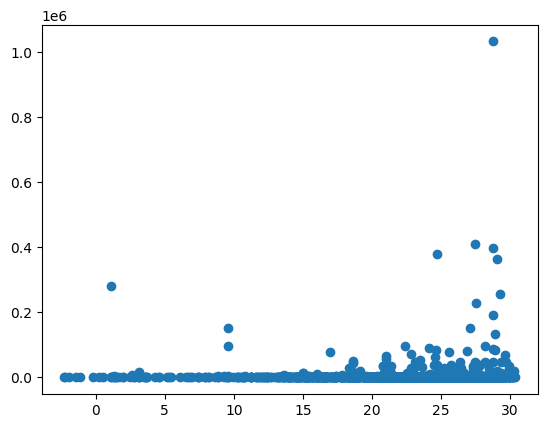

In [105]:
# Let's start with a simple graph-- a scatter plot between average temperature and acres burned
x_scatter = weather_fire_days["Temp (C)"]
y_scatter = weather_fire_days["Acres Burned"]
plt.scatter(x_scatter, y_scatter)
#This graph is listed in millions, and very clustered at the bottom. I imagine because there are countless tiny fires. Possibly ask about dropping fires burning under 10 acres?

(0.0, 1100000.0)

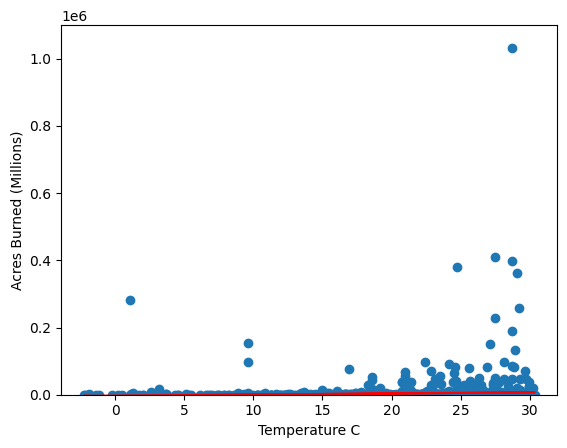

In [106]:
x_scatter = weather_fire_days["Temp (C)"]
y_scatter = weather_fire_days["Acres Burned"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_scatter, y_scatter) #Takes lin reg of data. r value = correl coeff.
regress_values = x_scatter * slope + intercept

plt.plot(x_scatter, regress_values, "r-", label=f"y={slope:.2f}x+{intercept:.2f}")

plt.scatter(x_scatter, y_scatter)
plt.xlabel("Temperature C")
plt.ylabel("Acres Burned (Millions)")
plt.ylim(0,1100000)

# that single fire so high is the "August complex" fire.

In [70]:
weather_fire_days["Acres Burned"].max()

np.float64(1032648.0)

(0.0, 1100000.0)

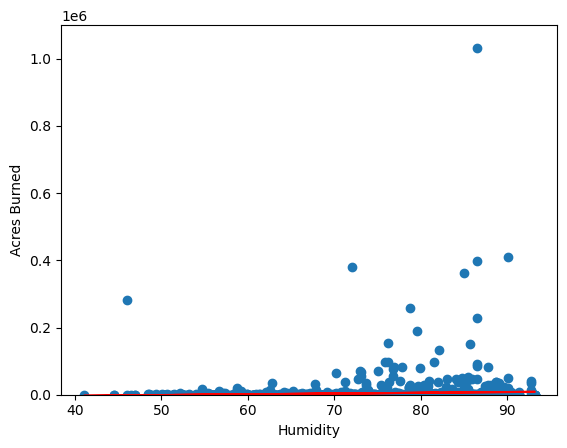

In [71]:
x_scatter = weather_fire_days["average humidity %"]
y_scatter = weather_fire_days["Acres Burned"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_scatter, y_scatter) #Takes lin reg of data. r value = correl coeff.
regress_values = x_scatter * slope + intercept

plt.plot(x_scatter, regress_values, "r-", label=f"y={slope:.2f}x+{intercept:.2f}")

plt.scatter(x_scatter, y_scatter)
plt.xlabel("Humidity")
plt.ylabel("Acres Burned (Millions)")
plt.ylim(0,1100000)

# that single fire so high is the "August complex" fire.

In [81]:
by_month = weather_fire_days.copy()

In [82]:
by_month["Fire Started"] = pd.to_datetime(by_month["Fire Started"])

In [83]:
by_month["Fire Started"] = by_month["Fire Started"].dt.month 

In [84]:
by_month

,Fire Started,Temp (C),average humidity %,average wind speed,Unnamed: 0,Incident Name,County,Administrative Unit,Acres Burned,Crews Involved,...,Injuries,Personnel Involved,Structures Damaged,Structures Destroyed,Structures Threatened,Water Tenders,Fire Extinguished,Longitude,Latitude,Incident ID
0,2,5.305556,81.930556,23.537500,0,River Fire,Inyo,CAL FIRE San Bernardino Unit,407.0,25.0,...,2.0,476.0,0.0,0.0,0.0,25.0,2013-02-28T20:00:00Z,-118.016510,36.602575,094719ba-a47b-4abb-9ec5-a506b2b9fd23
1,4,6.848611,67.430556,20.662500,1,Fawnskin Fire,San Bernardino,San Bernardino National Forest,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2013-04-22T09:00:00Z,-116.941311,34.288877,58f89ff8-bd3e-4355-b1c0-8fa05c747d3f
2,4,13.861111,58.111111,24.479167,2,Gold Fire,Madera,CAL FIRE Madera-Mariposa-Merced Unit,274.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2013-05-01T07:00:00Z,-119.635004,37.116295,357ffc13-bef9-48eb-810f-c5de851972eb
3,4,13.861111,58.111111,24.479167,3,Silverado Fire,Napa,CAL FIRE Sonoma-Lake-Napa Unit,75.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2013-05-01T17:15:00Z,-122.350844,38.441792,d8d1c943-7b5d-4885-9043-f41075d6eded
4,5,13.643056,62.125000,18.434722,4,Yellow Fire,Sonoma,CAL FIRE Sonoma-Lake-Napa Unit,125.0,9.0,...,0.0,249.0,0.0,0.0,0.0,5.0,2013-05-03T06:15:00Z,-122.655616,38.638828,64e4f81e-d872-44c4-ba8d-111fa77124ba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,12,2.613889,69.111111,25.077778,1704,Bond Fire,Orange,"Unified Command: CAL FIRE, Orange County Fire ...",6686.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2020-12-10T18:59:25Z,-117.674967,33.743842,a2665121-7dd7-4a4c-8c6e-0731ed9e1888
1705,12,1.998611,56.097222,20.865278,1705,Cerritos Fire,Riverside,CAL FIRE/ Riverside County Fire Department,200.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2020-12-06 11:03:31+00:00,-117.051463,33.773754,14c21ef6-b5b7-44a3-858b-666b57b750f3
1706,12,1.998611,56.097222,20.865278,1706,Thomas Fire,Lassen,CAL FIRE Lassen Modoc Unit,24.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2020-12-03T17:40:29Z,-120.374514,41.591948,ad807579-4f4f-4a5a-a17a-7ca299aca978
1707,12,1.355556,56.208333,18.512500,1707,Cornell Fire,Ventura,Ventura County Fire,174.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2020-12-08T11:17:54Z,-119.078000,34.336220,e8721404-3d22-4b27-b152-8a7f4a97a8e5


In [94]:
by_month_sum = by_month[["Fire Started" , "Acres Burned"]]
#by_month.groupby["Fire Started"].sum()

In [95]:
by_month_sum

,Fire Started,Acres Burned
0,2,407.0
1,4,30.0
2,4,274.0
3,4,75.0
4,5,125.0
...,...,...
1704,12,6686.0
1705,12,200.0
1706,12,24.0
1707,12,174.0


In [96]:
by_month_sum = by_month_sum.groupby(["Fire Started"]).sum()

In [101]:
by_month_sum = by_month_sum.reset_index()
by_month_sum

,Fire Started,Acres Burned
0,1,3286.0
1,2,3187.0
2,3,1205.0
3,4,13227.0
4,5,109062.0
5,6,340889.0
6,7,2294718.0
7,8,3127047.0
8,9,1019214.0
9,10,403198.0


In [102]:
by_month_sum["Fire Started"] = by_month_sum["Fire Started"].replace({1: "Jan", 2: "Feb", 3: "Mar", 4:"Apr" , 5:"May" , 6:"Jun" ,7:"Jul" , 8: "Aug",9: "Sep", 10:"Oct" , 11:"Nov", 12:"Dec"})

<function matplotlib.pyplot.show(close=None, block=None)>

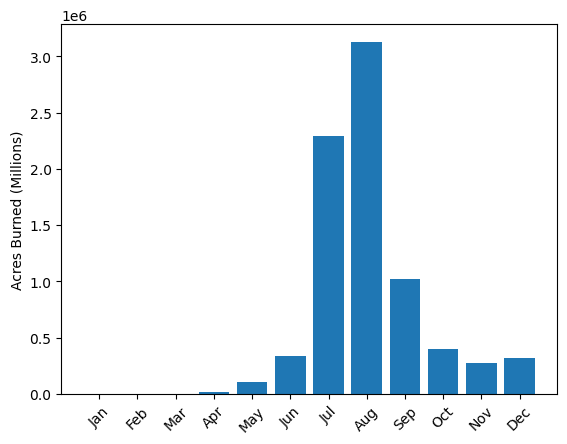

In [107]:
acres_burnt = by_month_sum["Acres Burned"]

plt.bar(x= by_month_sum["Fire Started"],height= acres_burnt)
plt.xticks(rotation=45)
plt.ylabel("Acres Burned (Millions)")
plt.show

In [133]:
by_month_avg = by_month[["Fire Started","Temp (C)","average humidity %", "average wind speed"]]# can't put Acres burned here; it averages fire size, rather than fires burned in december.
#to get average acres burned, we can divide by month sum by 8 years of data to get average burned per month
by_month_avg =  by_month_avg.groupby(["Fire Started"]).mean()
by_month_avg = by_month_avg.reset_index()
by_month_avg["Fire Started"] = by_month_avg["Fire Started"].replace({1: "Jan", 2: "Feb", 3: "Mar", 4:"Apr" , 5:"May" , 6:"Jun" ,7:"Jul" , 8: "Aug",9: "Sep", 10:"Oct" , 11:"Nov", 12:"Dec"})
by_month_avg

,Fire Started,Temp (C),average humidity %,average wind speed
0,Jan,1.355556,64.788889,17.285833
1,Feb,3.436250,70.873611,24.518889
2,Mar,9.209896,70.201389,26.035243
3,Apr,14.462024,61.575794,24.293056
4,May,19.038784,66.257728,24.141082
5,Jun,22.964775,73.374071,20.130664
6,Jul,26.399958,82.469484,18.964023
7,Aug,26.715147,80.408885,18.588170
8,Sep,22.829654,71.369339,17.659571
9,Oct,16.333885,69.025386,19.531328


<function matplotlib.pyplot.show(close=None, block=None)>

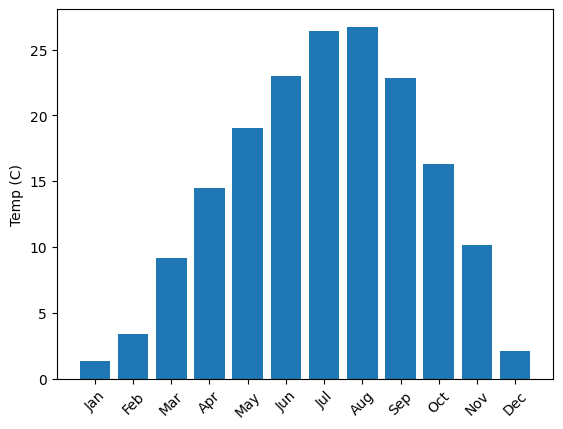

In [124]:
plt.bar(x= by_month_avg["Fire Started"],height= by_month_avg["Temp (C)"])
plt.xticks(rotation=45)
plt.ylabel("Temp (C)")
plt.show

In [109]:
by_year = weather_fire_days.copy()
by_year["Fire Started"] = pd.to_datetime(by_year["Fire Started"])
by_year["Fire Started"] = by_year["Fire Started"].dt.year 
by_year_sum = by_year[["Fire Started" , "Acres Burned"]]
by_year_sum = by_year_sum.groupby(["Fire Started"]).sum()
by_year_sum = by_year_sum.reset_index()
by_year_sum

,Fire Started,Acres Burned
0,2013,497485.0
1,2014,296982.0
2,2015,414202.0
3,2016,452101.0
4,2017,1449419.0
5,2018,1569513.0
6,2019,286810.0
7,2020,2942034.0


<function matplotlib.pyplot.show(close=None, block=None)>

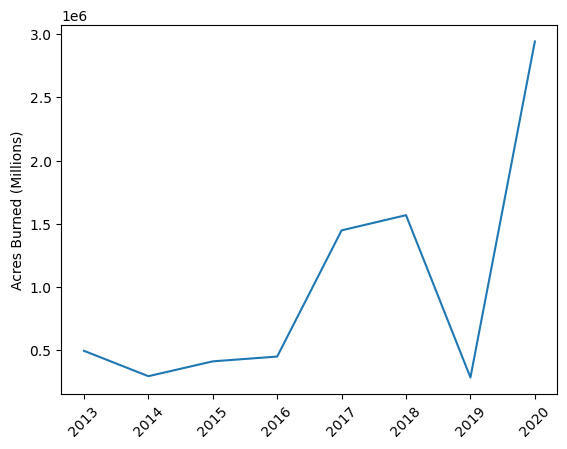

In [112]:
yearly_acres_burnt = by_year_sum["Acres Burned"]

plt.plot(by_year_sum["Fire Started"],yearly_acres_burnt)
plt.xticks(rotation=45)
plt.ylabel("Acres Burned (Millions)")
plt.show

In [135]:
#adding 8 year average burning by month
temp =  by_month_sum.copy()
temp["Acres Burned"] = temp["Acres Burned"]/8
temp
by_month_avg = pd.merge(by_month_avg, temp, on = ["Fire Started"], how = "inner")
by_month_avg

,Fire Started,Temp (C),average humidity %,average wind speed,Acres Burned
0,Jan,1.355556,64.788889,17.285833,410.750
1,Feb,3.436250,70.873611,24.518889,398.375
2,Mar,9.209896,70.201389,26.035243,150.625
3,Apr,14.462024,61.575794,24.293056,1653.375
4,May,19.038784,66.257728,24.141082,13632.750
5,Jun,22.964775,73.374071,20.130664,42611.125
6,Jul,26.399958,82.469484,18.964023,286839.750
7,Aug,26.715147,80.408885,18.588170,390880.875
8,Sep,22.829654,71.369339,17.659571,127401.750
9,Oct,16.333885,69.025386,19.531328,50399.750


In [ ]:
by_year_sum.to_csv('Cumulative Month averages.csv', index=False) 
by_month_avg.to_csv('Cumulative Month averages.csv', index=False)
by_month.to_csv('Full Fire Data, .csv', index=False)
weather_data.to_csv('Weather Data.csv', index=False)
avg_daily.to_csv('Daily Average Weather.csv', index=False)